In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

## VA + Horse + Precise

In [4]:
cdf_va_is = np.load('../../../../data/commaai/calibration/marginal_calibration/cdf_va_horse_dens.npy')
support = np.load('../../../../data/commaai/calibration/marginal_calibration/support_va_horse_dens.npy')

In [57]:
true_y = np.load('../../../../data/commaai/extracted_coefficients/20201027_filtered_gaussian_resampled/Bzeta/labels_val.npy')

In [61]:
all_conf_int_horse = []
for alpha2 in tqdm(np.append(np.linspace(0.05, 0.95, 10), float(0.99))):
    confidence_intervals = []
    alpha = 1- alpha2
    i = 0
    for cdf in cdf_va_is:
        lb = max(support[cdf <= alpha/2])
        try:
            ub = min(support[cdf >= 1-alpha/2])
        except: 
            print('error at index:' + str(i))
            ub = max(support)
        i += 1
        confidence_intervals.append([lb, ub])
    all_conf_int_horse.append(confidence_intervals)

 73%|███████▎  | 8/11 [07:20<02:42, 54.29s/it]

error at index:7163


 82%|████████▏ | 9/11 [08:13<01:48, 54.09s/it]

error at index:7163
error at index:9919
error at index:10364


 91%|█████████ | 10/11 [09:04<00:53, 53.05s/it]

error at index:384
error at index:1075
error at index:1156
error at index:1294
error at index:1328
error at index:1381
error at index:1644
error at index:2096
error at index:2442
error at index:2645
error at index:3014
error at index:4313
error at index:4924
error at index:5155
error at index:5657
error at index:6020
error at index:6340
error at index:6371
error at index:6372
error at index:7163
error at index:7165
error at index:7687
error at index:8552
error at index:8654
error at index:9314
error at index:9792
error at index:9801
error at index:9813
error at index:9919
error at index:10122
error at index:10211
error at index:10312
error at index:10364
error at index:10389
error at index:10406
error at index:10438
error at index:10441


100%|██████████| 11/11 [09:53<00:00, 53.96s/it]

error at index:10443
error at index:10447


In [62]:
conf_widths_horse = []
for level in range(0, np.append(np.linspace(0.05, 0.95, 10), float(0.99)).shape[0]):  
    conf_width = np.array([all_conf_int[level][i][1] - all_conf_int[level][i][0] for i in range(0, len(cdf_va_is))])
    conf_widths_horse.append(conf_width)

In [63]:
np.mean(np.array(conf_widths), axis = 1)

array([ 0.25893381,  0.77073837,  1.29942082,  1.86006825,  2.47319267,
        3.16945042,  4.00670416,  5.10494615,  6.7845136 , 10.58900136,
       16.94204986])

In [ ]:
cdf_va_is = np.load('../../../../data/commaai/calibration/marginal_calibration/cdf_va_horse_dens.npy')

## VA/HMC + Ridge + Precise

In [47]:
cdf_hmc_ridge_is = np.load('../../../../data/commaai/calibration/marginal_calibration/cdf_hmc_ridge_dens.npy')

In [48]:
all_conf_int_ridge = []
for alpha2 in tqdm(np.append(np.linspace(0.05, 0.95, 10), float(0.99))):
    confidence_intervals = []
    alpha = 1- alpha2
    i = 0
    for cdf in cdf_hmc_ridge_is:
        lb = max(support[cdf <= alpha/2])
        try:
            ub = min(support[cdf >= 1-alpha/2])
        except: 
            print('error at index:' + str(i))
            ub = max(support)
        i += 1
        confidence_intervals.append([lb, ub])
    all_conf_int_ridge.append(confidence_intervals)

100%|██████████| 11/11 [08:47<00:00, 47.98s/it]


In [49]:
conf_widths_ridge = []
for level in range(0, np.append(np.linspace(0.05, 0.95, 10), float(0.99)).shape[0]):  
    conf_width = np.array([all_conf_int_ridge[level][i][1] - all_conf_int_ridge[level][i][0] for i in range(0, len(cdf_va_is))])
    conf_widths_ridge.append(conf_width)

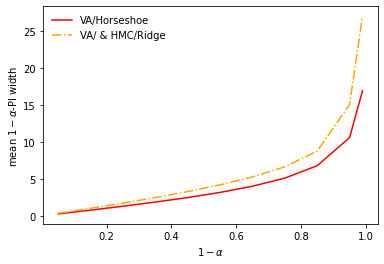

In [82]:
plt.plot(np.append(np.linspace(0.05, 0.95, 10), float(0.99)), np.mean(np.abs(np.array(conf_widths_horse)), axis = 1), label = 'VA/Horseshoe', color = 'red')
plt.plot(np.append(np.linspace(0.05, 0.95, 10), float(0.99)), np.mean(np.abs(np.array(conf_widths_ridge)), axis = 1), label = 'VA/ & HMC/Ridge', linestyle = '-.', color = 'orange')
plt.xlabel((r'$1- \alpha$'))
plt.ylabel(r'mean $1 - \alpha$-PI width')
plt.legend()
plt.legend(framealpha=0.0)
plt.savefig('mean_pi_width.png', dpi = 900)

In [71]:
coverage_rate_ridge = []
for i in range(0, np.append(np.linspace(0.05, 0.95, 10), float(0.99)).shape[0]):
    confidence_intervals = all_conf_int_ridge[i]
    in_interval = []
    for i in range(0, len(cdf_va_is)):
        conf_int = confidence_intervals[i]
        if conf_int[0] <= true_y[i] <= conf_int[1]:
            in_interval.append(1)
        else:
            in_interval.append(0)
    mean_int = np.mean(in_interval)
    coverage_rate_ridge.append(mean_int)

In [72]:
coverage_rate_horse = []
for i in range(0, np.append(np.linspace(0.05, 0.95, 10), float(0.99)).shape[0]):
    confidence_intervals = all_conf_int_horse[i]
    in_interval = []
    for i in range(0, len(cdf_va_is)):
        conf_int = confidence_intervals[i]
        if conf_int[0] <= true_y[i] <= conf_int[1]:
            in_interval.append(1)
        else:
            in_interval.append(0)
    mean_int = np.mean(in_interval)
    coverage_rate_horse.append(mean_int)

# Prediction Interval accuracy

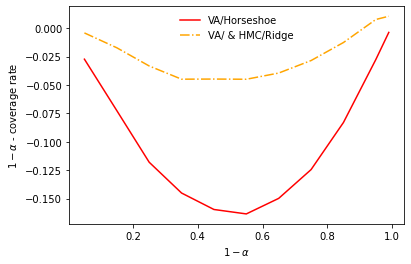

In [81]:
levels = np.append(np.linspace(0.05, 0.95, 10), float(0.99))
plt.plot(levels, levels - np.array(coverage_rate_ridge), label = 'VA/Horseshoe', color = 'red')
plt.plot(levels, levels - np.array(coverage_rate_horse), label = 'VA/ & HMC/Ridge', linestyle = '-.', color = 'orange')
plt.xlabel((r'$1- \alpha$'))
plt.ylabel(r'$1- \alpha$ - coverage rate')
plt.legend()
plt.legend(framealpha=0.0)
plt.savefig('coverage_rate.png', dpi = 900)
# coverage rate is actually higher than predicted coverage rate

In [73]:
coverage_rate_horse

[0.054239877769289534,
 0.16730328495034377,
 0.28332696715049654,
 0.3949579831932773,
 0.49484339190221543,
 0.5950152788388082,
 0.6895530939648586,
 0.7785523300229182,
 0.862681436210848,
 0.9424178762414056,
 0.9795645530939648]